Lab ML for Data Science: Part II

In [1]:
import numpy as np
import pandas as pd
import torch,torch.optim
import scipy,scipy.spatial
import sklearn,sklearn.datasets
import seaborn as sns
from matplotlib import pyplot as plt

# 1 The QM7 Dataset

The QM7 dataset consists of 7165 organic molecules, each of which is composed of up to 23 atoms. The 3d coordinates of each atom in each molecule are available in the variable R. It is an array of size 7165 ×23 ×3 containing for each molecule and atom a triplet representing the 3d coordinates. The variable Z is an array of size 7165×23 which gives for each molecule and atom of the molecule the corresponding atomic number. An atomic number of 1 corresponds to a hydrogen atom (H), the number 6 corresponds to carbon (C), the numbers 7 and 8 to nitrogen (N) and oxygen (O) respectively, and finally, the number 16 corresponds to sulfur (S). If the number is zero, then it indicates that there is no atom at this index, and the corresponding 3d coordinate should therefore be ignored. This allows for representing in the same array molecules of different sizes. In addition to these geometrical features of the molecule, the dataset also provides for each molecule its atomization energy (computed via quantum-chemical simulation). These atomization energy values are stored in the variable T, an array of size 7165.

TLDR:

3D coordinates of each atom in each molecule: \
R: 7165 x 23 x 3

Atomic number of each atom in each molecule: \
Z: 7165 x 23 
- 1:    Hydrogen(H)
- 6:    Carbon(C)
- 7:    Nitrogen(N)
- 8:    Oxygen(O)
- 16:   Sulfur(S)
- 0:    No atom

Atomization energy values of the molecules: \
T: 7165



In [2]:
dataset = scipy.io.loadmat("qm7.mat")
R = dataset["R"]
Z = dataset["Z"]
T = dataset["T"]

## 1.1 Visualizing Molecules
There are a variety of libraries for rendering molecular geometries with various degrees of sophistication. A quick and dirty approach is to use the scatter plot function of matplotlib, where each point is an atom (e.g. plotted according to its xy-coordinates and discarding the z-coordinate). Note that bonds are not provided as part of QM7 because they are strictly speaking not needed to infer chemical properties (bonds can be derived from atom coordinates). To better visualize the molecule, one can draw connections between nearby atoms by plotting a line between two atoms if the Euclidean distance between the two is smaller than a fixed threshold.

In [ ]:
for visual,atom in enumerate(molecule_xy[:1000]):
    atom_xy = atom[(atom[:,0] != 0) | (atom[:,1] != 0), :]
    atom_x = atom_xy[:,0]
    atom_y = atom_xy[:,1]
    ax = plt.subplot(720, 10, visual + 1)
    plt.scatter(atom_x, atom_y,marker='.',linewidths=0.01)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.show()

In [224]:
molecule_xy = R[:,:,:2]

xlim = [-10,20]
ylim = [-5,15]

plt.figure(figsize=(15, 500))
for visual,atom in enumerate(molecule_xy[:1000]):
    atom_xy = atom[(atom[:,0] != 0) | (atom[:,1] != 0), :]
    atom_x = atom_xy[:,0]
    atom_y = atom_xy[:,1]
    ax = plt.subplot(720, 10, visual + 1)
    plt.scatter(atom_x, atom_y,marker='.',linewidths=0.01)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.show()




(7165, 23, 2)
[-5.447457  -9.9047165]
[6. 6. 6. 6. 6. 7. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.7828054e+00  1.5306781e-03  5.6453681e-01  1.8640070e+00
 -2.2841120e+00  1.4654070e+00 -2.3087163e+00 -1.4176159e+00
  5.3248703e-01 -1.8675597e+00  1.4954537e+00 -2.4358571e-02
  3.8540020e+00 -1.5665829e-02  1.0439225e+00  2.2090899e-02
  1.3178195e+00  3.7774303e+00 -3.0662508e+00  2.2650447e+00
 -3.3047342e+00  2.2419901e+00 -3.3425286e+00 -2.1997924e+00
 -3.1045365e+00 -2.1784008e+00  1.2529262e+00 -3.7953260e+00
  4.9032724e-01 -2.7816769e-02]
[[ 1.7828054e+00  1.5306781e-03]
 [ 5.6453681e-01  1.8640070e+00]
 [-2.2841120e+00  1.4654070e+00]
 [-2.3087163e+00 -1.4176159e+00]
 [ 5.3248703e-01 -1.8675597e+00]
 [ 1.4954537e+00 -2.4358571e-02]
 [ 3.8540020e+00 -1.5665829e-02]
 [ 1.0439225e+00  2.2090899e-02]
 [ 1.3178195e+00  3.7774303e+00]
 [-3.0662508e+00  2.2650447e+00]
 [-3.3047342e+00  2.2419901e+00]
 [-3.3425286e+00 -2.1997924e+00]
 [-3.1045365e+00 -2.1784008e+00]
 [ 

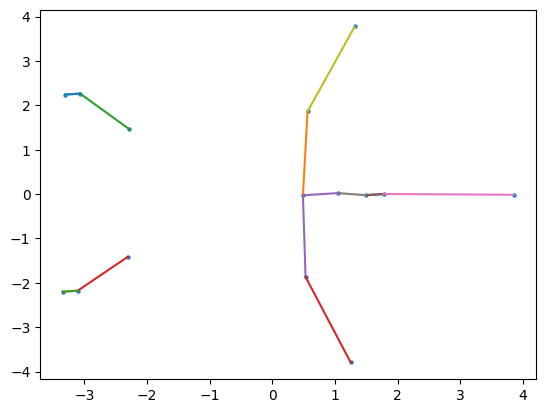

In [175]:
molecule_xy = R[:,:,:2]
print(molecule_xy.shape)
atom_xy = molecule_xy[2]
#print(atom_xy)
print(np.min(np.min(molecule_xy,axis=1),axis=0))
print(Z[225])

def atom_distance(xy):
    atom_dist = scipy.spatial.distance.cdist(xy,xy, 'euclidean')
    return atom_dist

atomasda = atom_xy[np.nonzero(atom_xy)]
print(atomasda)
asdgaf = atomasda.reshape(int(len(atomasda)/2),2)
print(asdgaf)
atom_distances = atom_distance(asdgaf)
print(atom_distances)


#print(atom_distance(atom_x,atom_y))

#plt.figure(figsize=(30, 20))
plt.scatter(asdgaf[:,0],asdgaf[:,1],marker='.',linewidths=0.1,edgecolors=None)
atom_distances_masf = np.ma.masked_equal(atom_distances, 0.)

potata = np.argmin(atom_distances_masf,axis=1)
potata2 = np.mean(atom_distances_masf)
potata3 = np.std(atom_distances_masf)

print(potata)
print(potata2)
print(potata2-1/2*potata3)
print(np.round(potata2))
for i,ma in enumerate(potata):
    plt.plot([asdgaf[i,0], asdgaf[ma,0]], [asdgaf[i,1], asdgaf[ma,1]])
#[2.06348646 2.06347194 1.21548155 1.16859769 3.37018079 2.93778365 2.89950239 2.93777702 2.89949876 0.04688387]